Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#import geopandas as gpd

In [5]:
data_file = "./mmtd_with_genre.csv"

In [6]:
df_mmtd = pd.read_csv(data_file)

In [7]:
df_mmtd.shape

(1090726, 311)

In [8]:
df_mmtd.groupby('country')['tweet_userId'].nunique().sort_values(ascending=False).head(20)

country
US    70204
ID    30605
BR    24985
MY    14771
FR    13890
GB     9006
RU     5234
NL     5223
MX     4538
TR     2878
ES     2847
SG     2422
PH     2385
CA     2344
IT     1521
JP     1501
ZA     1297
DE     1133
UA     1062
AR      874
Name: tweet_userId, dtype: int64

In [9]:
df_mmtd.groupby('country')['tweet_id'].nunique().sort_values(ascending=False).head(20)

country
US    227432
DE    153163
BR    145049
GB    130951
ID     94245
FR     65525
MY     50648
CA     27370
RU     23542
MX     18717
NL     18320
TR     14479
ES     11811
SG      7637
IT      6412
AR      6319
PH      5723
JP      5529
UA      4940
ZA      3733
Name: tweet_id, dtype: int64

In [10]:
num_tweets = df_mmtd['tweet_id'].nunique()
num_tracks = df_mmtd['tweet_trackId'].nunique()
num_artists = df_mmtd['tweet_artistId'].nunique()
num_users = df_mmtd['tweet_userId'].nunique()
num_countries = df_mmtd['countryName'].nunique()

In [11]:
print("Number of tweets: ", num_tweets)
print("Number of tracks: ", num_tracks)
print("Number of artists: ", num_artists)
print("Number of users: ", num_users)
print("Number of countries: ", num_countries)

Number of tweets:  1090726
Number of tracks:  134199
Number of artists:  25081
Number of users:  215375
Number of countries:  202


In [12]:
df_mmtd['tweet_trackId'].value_counts().describe()

count    134199.000000
mean          8.127676
std          45.066122
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        4387.000000
Name: tweet_trackId, dtype: float64

In [13]:
df_mmtd['tweet_artistId'].value_counts().describe()

count    25081.000000
mean        43.488138
std        328.301065
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max      18090.000000
Name: tweet_artistId, dtype: float64

In [14]:
print("Average number of users per country: ", df_mmtd.groupby('countryName')['tweet_userId'].nunique().describe()) 

Average number of users per country:  count      202.000000
mean      1078.420792
std       5847.524323
min          1.000000
25%          6.250000
50%         29.500000
75%        220.750000
max      70204.000000
Name: tweet_userId, dtype: float64


In [15]:
print("Average number of tweets per country: ", df_mmtd.groupby('countryName')['tweet_id'].nunique().describe())

Average number of tweets per country:  count       202.000000
mean       5380.495050
std       25032.449649
min           1.000000
25%          14.250000
50%          74.500000
75%         657.500000
max      227432.000000
Name: tweet_id, dtype: float64


In [16]:
df_mmtd['tweet_datetime'] = pd.to_datetime(df_mmtd['tweet_datetime'])

In [17]:
!pip install timezonefinder

In [18]:
from timezonefinder import TimezoneFinder

In [19]:
obj = TimezoneFinder()

In [20]:
df_mmtd['timezone'] = df_mmtd.apply(lambda row: obj.timezone_at(lng=row['tweet_longitude'], lat=row['tweet_latitude']), axis=1)

In [21]:
df_mmtd['tweet_datetime'] = df_mmtd.apply(lambda row: row['tweet_datetime'].tz_localize('UTC').tz_convert(row['timezone']), axis=1)

In [22]:
df_mmtd['hour'] = df_mmtd.apply(lambda row: row['tweet_datetime'].hour, axis=1)

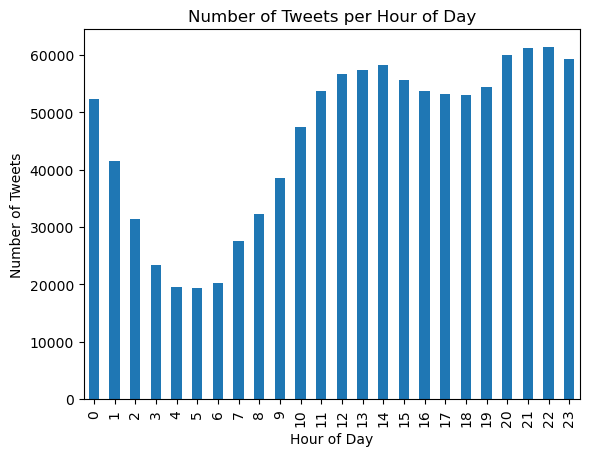

In [23]:
# Plot number of tweets per hour
df_mmtd['hour'].value_counts().sort_index().plot(kind='bar', title='Number of Tweets per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.show()

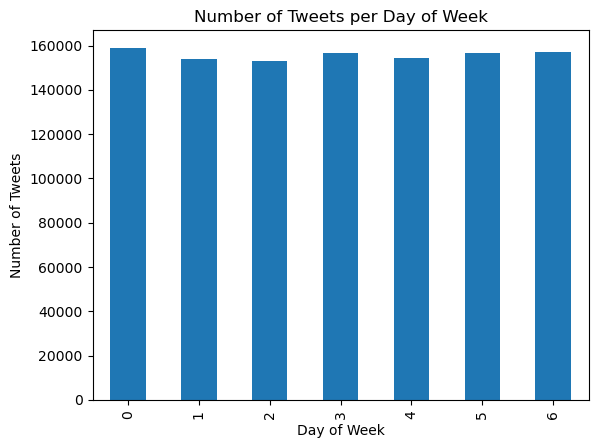

In [24]:
# Plot number of tweets per day of week
df_mmtd['dow'] = df_mmtd.apply(lambda row: row['tweet_datetime'].weekday(), axis=1)
df_mmtd['dow'].value_counts().sort_index().plot(kind='bar', title='Number of Tweets per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tweets')
plt.show()

In [25]:
genreFilter = ['rnb', 'rap', 'electronic', 'rock', 'newage', 'classical', 'reggae', 'blues', 'country', 'world', 'folk', 'easylistening', 'jazz', 'vocal', 'children\'s', 'punk', 'alternative', 'spokenword', 'pop', 'heavymetal']

In [26]:
newGenreFilter = ['genre_' + genre for genre in genreFilter]

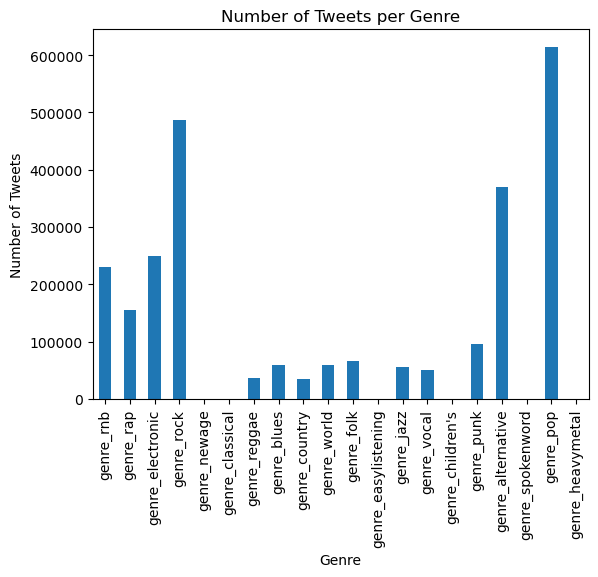

In [28]:
# Plot the number of tweets per genre
df_mmtd[newGenreFilter].sum().plot(kind='bar', title='Number of Tweets per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Tweets')
plt.show()

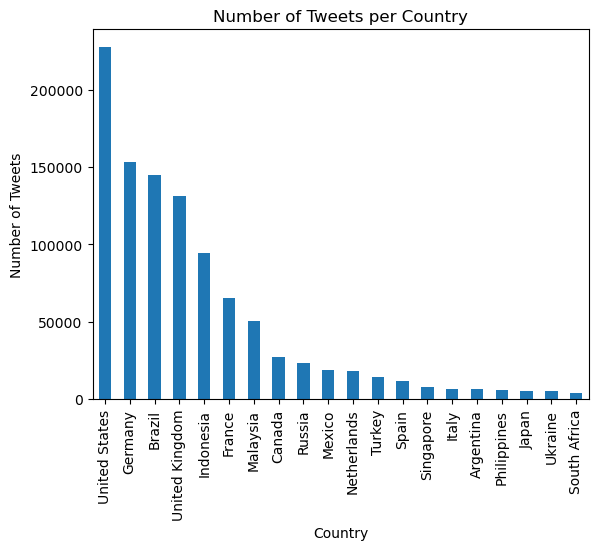

In [33]:
# plot the number of Tweets per country
df_mmtd['countryName'].value_counts().head(20).plot(kind='bar', title='Number of Tweets per Country')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.show()

In [56]:
df_mmtd['artist_name'].value_counts().head(25)

Rihanna                 18090
Drake                   17326
Adele                   14080
Coldplay                12916
Chris Brown             11857
BoB feat. Bruno Mars     9344
Katy Perry               8764
Beyonce                  8752
Usher                    7378
Linkin Park              7340
Maroon 5                 6937
Eminem                   6382
Nicki Minaj              6263
Lady GaGa                6255
Paramore                 5986
One Direction            5924
Justin Bieber            5630
Wiz Khalifa              5316
Avenged Sevenfold        5154
Taylor Swift             5133
Lana Del Ray             5125
Trey Songz               5050
Lil Wayne                4907
Kanye                    4893
Muse                     4506
Name: artist_name, dtype: int64

In [68]:
df_mmtd[df_mmtd['artist_name']=='MJ'].shape

(8, 313)

In [ ]:
# plot the number of Tweets per city
df_mmtd['countryName'].value_counts().head(20).plot(kind='bar', title='Number of Tweets per Country')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.show()

In [64]:
df_mmtd[df_mmtd['countryName']=='India'].shape

(1616, 313)

In [58]:
lang_cols = [i for i in df_mmtd.columns if i.startswith("lang_")]

In [59]:
lang_cols

['lang_aa',
 'lang_ady',
 'lang_af',
 'lang_ak',
 'lang_am',
 'lang_ar',
 'lang_arc',
 'lang_as',
 'lang_av',
 'lang_ava',
 'lang_ay',
 'lang_az',
 'lang_ba',
 'lang_bal',
 'lang_be',
 'lang_bem',
 'lang_bg',
 'lang_bh',
 'lang_bho',
 'lang_bi',
 'lang_bm',
 'lang_bn',
 'lang_br',
 'lang_brh',
 'lang_bs',
 'lang_bua',
 'lang_ca',
 'lang_cau',
 'lang_ce',
 'lang_ch',
 'lang_chk',
 'lang_chm',
 'lang_cmn',
 'lang_co',
 'lang_cs',
 'lang_cv',
 'lang_cy',
 'lang_da',
 'lang_dag',
 'lang_de',
 'lang_diq',
 'lang_dje',
 'lang_doi',
 'lang_dta',
 'lang_dv',
 'lang_dz',
 'lang_ee',
 'lang_el',
 'lang_en',
 'lang_es',
 'lang_et',
 'lang_eu',
 'lang_fa',
 'lang_ff',
 'lang_fi',
 'lang_fia',
 'lang_fil',
 'lang_fj',
 'lang_fo',
 'lang_fr',
 'lang_frp',
 'lang_fuc',
 'lang_fud',
 'lang_fy',
 'lang_ga',
 'lang_gag',
 'lang_gd',
 'lang_gil',
 'lang_gl',
 'lang_gn',
 'lang_gu',
 'lang_gv',
 'lang_ha',
 'lang_hak',
 'lang_haw',
 'lang_he',
 'lang_hi',
 'lang_hna',
 'lang_hns',
 'lang_ho',
 'lang_hr',


In [63]:
df_mmtd[lang_cols].sum().sort_values(ascending=False).head(25)

lang_en     724863.0
lang_fr     493602.0
lang_es     424456.0
lang_haw    227432.0
lang_de     171577.0
lang_pt     148791.0
lang_cy     130951.0
lang_gd     130951.0
lang_nl     115150.0
lang_jv      94266.0
lang_id      94245.0
lang_ca      83763.0
lang_eu      77336.0
lang_oc      77336.0
lang_co      71937.0
lang_frp     65525.0
lang_br      65525.0
lang_ta      60522.0
lang_zh      58941.0
lang_ms      58522.0
lang_pa      52416.0
lang_te      52264.0
lang_ml      52264.0
lang_th      51631.0
lang_ru      33356.0
dtype: float64

In [31]:
# Spatio-temporal Statistical Aspects

sampleCountry = ['Brazil', 'France', 'Indonesia', 'Malaysia', 'United States']
sample_dow = [4, 6, 0, 2, 1]
sample_time = [0, 5, 12, 17, 21]

# Find the number of tweets per genre for each combination of country, dow and time

df_st_decomposition = pd.DataFrame(columns=['countryName', 'dow', 'hour'] + newGenreFilter)

for country, dow in zip(sampleCountry, sample_dow):
  for time in sample_time:
    df_st_decomposition.loc[len(df_st_decomposition)] = [country, dow, time] + list(df_mmtd[(df_mmtd['countryName'] == country) & (df_mmtd['dow'] == dow) & (df_mmtd['hour'] == time)][newGenreFilter].sum())
df_st_decomposition

,countryName,dow,hour,genre_rnb,genre_rap,genre_electronic,genre_rock,genre_newage,genre_classical,genre_reggae,...,genre_folk,genre_easylistening,genre_jazz,genre_vocal,genre_children's,genre_punk,genre_alternative,genre_spokenword,genre_pop,genre_heavymetal
0,Brazil,4,0,161.0,107.0,206.0,666.0,0.0,0.0,44.0,...,60.0,0.0,49.0,37.0,0.0,176.0,473.0,0.0,611.0,1.0
1,Brazil,4,5,10.0,8.0,29.0,51.0,0.0,0.0,5.0,...,3.0,0.0,3.0,5.0,0.0,13.0,31.0,0.0,41.0,0.0
2,Brazil,4,12,210.0,140.0,293.0,701.0,0.0,0.0,70.0,...,58.0,0.0,48.0,57.0,0.0,188.0,533.0,0.0,692.0,0.0
3,Brazil,4,17,165.0,125.0,248.0,689.0,0.0,0.0,49.0,...,60.0,1.0,50.0,51.0,0.0,190.0,540.0,0.0,645.0,0.0
4,Brazil,4,21,233.0,171.0,370.0,931.0,0.0,0.0,63.0,...,80.0,0.0,53.0,65.0,0.0,240.0,672.0,0.0,880.0,1.0
5,France,6,0,195.0,130.0,87.0,103.0,0.0,0.0,21.0,...,14.0,0.0,16.0,24.0,0.0,12.0,80.0,0.0,224.0,0.0
6,France,6,5,19.0,9.0,8.0,6.0,0.0,0.0,1.0,...,3.0,0.0,3.0,2.0,0.0,0.0,4.0,0.0,19.0,0.0
7,France,6,12,229.0,223.0,156.0,147.0,0.0,0.0,35.0,...,33.0,0.0,30.0,25.0,0.0,22.0,138.0,0.0,339.0,0.0
8,France,6,17,202.0,126.0,125.0,128.0,0.0,0.0,29.0,...,20.0,0.0,18.0,36.0,0.0,13.0,94.0,0.0,281.0,0.0
9,France,6,21,198.0,139.0,103.0,120.0,0.0,0.0,18.0,...,20.0,0.0,18.0,14.0,0.0,13.0,107.0,0.0,250.0,0.0


In [ ]:
import ge